<a href="https://colab.research.google.com/github/ChangYujieCN/deep-learning-with-python/blob/main/5_2_training_a_convnet_from_scratch_on_a_small_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr 18 12:58:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wolfgang1085","key":"1f52ee9d0dfd7cf601d145560346bded"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-17 19:10:49           3032  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1780  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1218  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            338  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [9]:
!kaggle competitions download -c 'dogs-vs-cats'

 96% 261M/271M [00:03<00:00, 58.4MB/s]
100% 271M/271M [00:03<00:00, 74.2MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.5MB/s]
 98% 535M/543M [00:06<00:00, 125MB/s] 
100% 543M/543M [00:06<00:00, 87.2MB/s]


In [10]:
! mkdir train
! unzip train.zip -d train

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519.jpg  
  inflating: trai

In [11]:
import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train/train/'

# The directory where we will
# store our smaller dataset


base_dir = '/content/cats_and_dogs_small'
if os.path.isdir(base_dir):
  shutil.rmtree('/content/cats_and_dogs_small')
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), # Resize all image to 150 x 150
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), # Resize all image to 150 x 150
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
def generator():
  i = 0
  while True:
    i += 1
    yield i

for item in generator():
  print(item)
  if item > 4:
    break

1
2
3
4
5


In [17]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
# 因为数据是不断生成的，所以Keras模型要知道每一轮需要从生成器中抽取多少个样本。
# 这是steps_per_epoch参数的作用：从生成器中抽取steps_per_epoch个批量后（即运行了steps_per_epoch次梯度下降），拟合过程将进入下一个轮次
# 本例中，每个批量包含20个样本，所以读取完所有2000个样本需要100个批量

Epoch 1/30
100/100 [==============================] - 25s 84ms/step - loss: 0.6908 - accuracy: 0.5464 - val_loss: 0.6755 - val_accuracy: 0.5630
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6633 - accuracy: 0.5965 - val_loss: 0.6271 - val_accuracy: 0.6510
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6212 - accuracy: 0.6558 - val_loss: 0.6014 - val_accuracy: 0.6740
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5610 - accuracy: 0.7142 - val_loss: 0.6066 - val_accuracy: 0.6620
Epoch 5/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5443 - accuracy: 0.7169 - val_loss: 0.5772 - val_accuracy: 0.6980
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5173 - accuracy: 0.7324 - val_loss: 0.5779 - val_accuracy: 0.6880
Epoch 7/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5059 - accuracy: 0.7595 - val_loss: 0.5611 - val_accuracy: 0.713

In [19]:
model.save('cat_and_dogs_small_1.h5')

In [20]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

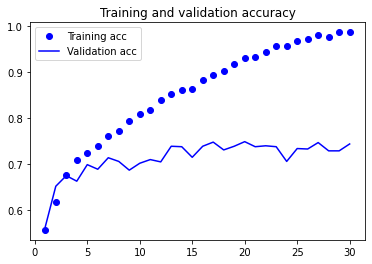

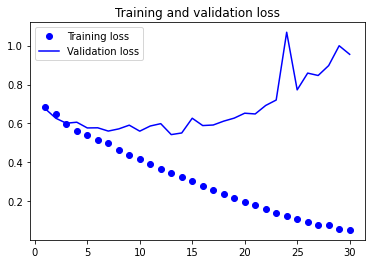

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")

plt.title('Training and validation loss')
plt.legend()

plt.show()

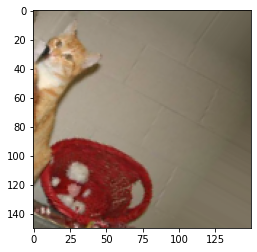

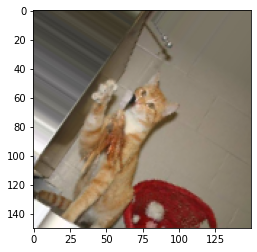

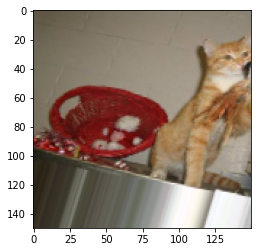

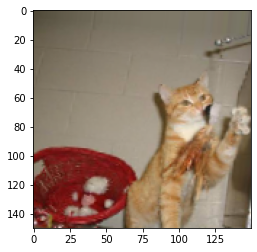

In [22]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# 随机增强
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)# 转化为(150, 150, 3)的numpy数组

x = x.reshape((1,) + x.shape) # 改变形状为(1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 ==0:
    break

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [24]:
import numpy as np

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
# https://keras.io/api/preprocessing/image/
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6971 - acc: 0.5160 - val_loss: 0.6905 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6807 - acc: 0.5456 - val_loss: 0.6654 - val_acc: 0.6050
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6708 - acc: 0.6044 - val_loss: 0.6503 - val_acc: 0.6080
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6650 - acc: 0.5702 - val_loss: 0.6369 - val_acc: 0.6070
Epoch 5/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6527 - acc: 0.6047 - val_loss: 0.6203 - val_acc: 0.6470
Epoch 6/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6355 - acc: 0.6280 - val_loss: 0.6196 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6252 - acc: 0.6561 - val_loss: 0.6257 - val_acc: 0.6540
Epoch 8/100
100/100 [===========================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


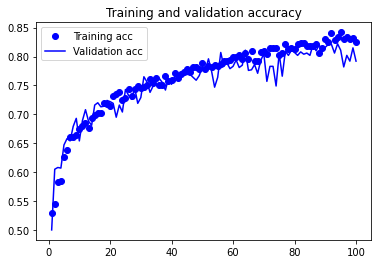

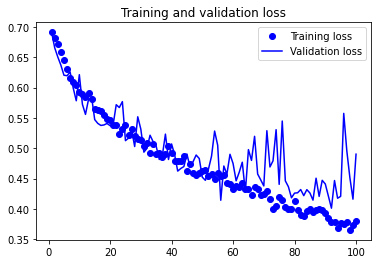

In [25]:
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")

plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
model.save('cats_and_dogs_small_2.h5')

In [27]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [28]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i+=1
    if i*batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
# flatten them to (samples, 8192)
train_features = np.reshape(train_features, (2000, 4* 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4* 4 * 512))
test_features = np.reshape(test_features, (1000, 4* 4 * 512))

In [30]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer= optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])
history= model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6509 - acc: 0.6330 - val_loss: 0.4506 - val_acc: 0.8330
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4468 - acc: 0.8167 - val_loss: 0.3761 - val_acc: 0.8410
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3780 - acc: 0.8393 - val_loss: 0.3287 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3256 - acc: 0.8678 - val_loss: 0.3051 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3056 - acc: 0.8713 - val_loss: 0.2871 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2565 - acc: 0.8936 - val_loss: 0.2924 - val_acc: 0.8730
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2692 - acc: 0.8968 - val_loss: 0.2657 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

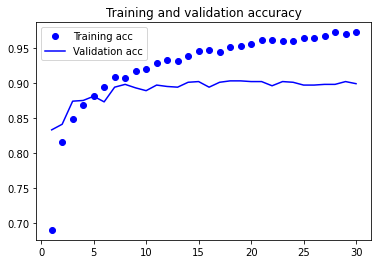

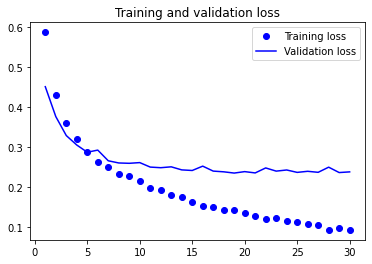

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [40]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))
# 如此设置之后，只有添加的两个Dense层的权重才会被训练。总共有4个权重张量，每层2个（主权重矩阵和偏置向量）。

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 19s 187ms/step - loss: 0.6582 - acc: 0.5852 - val_loss: 0.4634 - val_acc: 0.8090
Epoch 2/30
100/100 [==============================] - 18s 185ms/step - loss: 0.5132 - acc: 0.7645 - val_loss: 0.3790 - val_acc: 0.8410
Epoch 3/30
100/100 [==============================] - 19s 185ms/step - loss: 0.4355 - acc: 0.8131 - val_loss: 0.3287 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 19s 187ms/step - loss: 0.4025 - acc: 0.8229 - val_loss: 0.3021 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3683 - acc: 0.8456 - val_loss: 0.3085 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3710 - acc: 0.8303 - val_loss: 0.2950 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 18s 184ms/step - loss: 0.3706 - acc: 0.8303 - val_loss: 0.2752 - val_acc: 0.8910
Epoch 8/30
100/100 [==============================] - 1

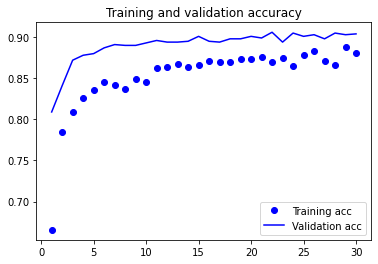

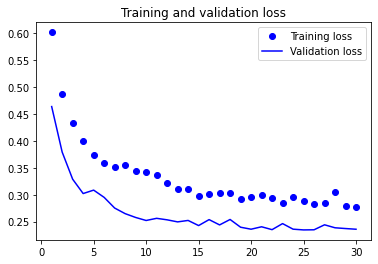

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
# 注意，为了让这些修改生效，你必须先编译模型
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc']) # 科学计数法 2 x 10^(-5)
# https://keras.io/api/preprocessing/image/
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      )

print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")

plt.title('Training and validation loss')
plt.legend()

plt.show()


In [42]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [43]:
conv_base.trainable=True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [45]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 20s 188ms/step - loss: 0.3255 - acc: 0.8502 - val_loss: 0.2656 - val_acc: 0.8900
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2364 - acc: 0.8927 - val_loss: 0.2298 - val_acc: 0.9060
Epoch 3/100
100/100 [==============================] - 19s 188ms/step - loss: 0.2559 - acc: 0.8919 - val_loss: 0.2053 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 0.2022 - acc: 0.9153 - val_loss: 0.1980 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 19s 189ms/step - loss: 0.2029 - acc: 0.9266 - val_loss: 0.1993 - val_acc: 0.9280
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.1711 - acc: 0.9317 - val_loss: 0.1905 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 19s 189ms/step - loss: 0.1470 - acc: 0.9414 - val_loss: 0.1858 - val_acc: 0.9330
Epoch 8/100
100/100 [===========================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


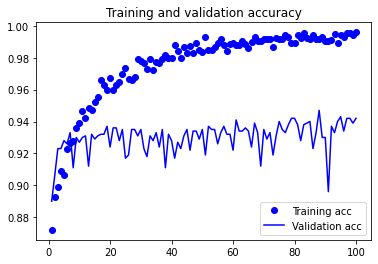

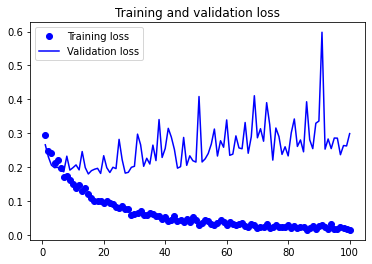

In [46]:
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")

plt.title('Training and validation loss')
plt.legend()

plt.show()


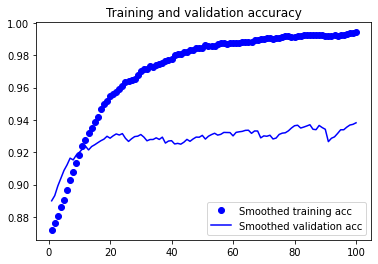

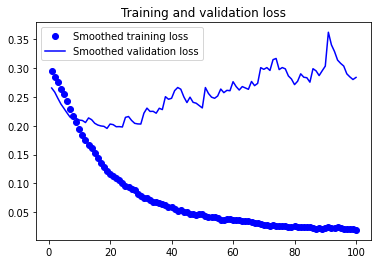

In [49]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * ( 1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)